## Problem Statement

A mall wants to get insights about their customers. They have data about cutomers purchasing behavior. We are going to build a system that can cluster customers into different groups based on their purchasing behavior.

The workflow for this project would be as follows:

1. Load the data
2. Preprocess the data
3. Analyze the data
4. Choose the optimum number of clusters
5. Feed the data to the clustering algorithm
6. Visualize the clusters

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Analysis

In [3]:
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Spending score is a score assigned to the customer based on defined parameters like customer behavior and purchasing data. This is as much context we got from the dataset. We can assume it is how much (volume or currecnty) a customer spends in the mall.

In [5]:
customer_data.shape

(200, 5)

There are 200 customers in the dataset (observations). This is a healthy number of observations to work with. 

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There is no missing data in the dataset. This is a good sign. We don't have to worry about imputing missing data.

## Feature Selection

We are going to use only two features for clustering: `Annual Income` and `Spending Score`. We are going to ignore the `CustomerID`, `Gender`, and `Age` columns. These columns might be useful but Annual Income and Spending Score are more relevant for now.

In [9]:
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

## Choosing the Optimum Number of Clusters

We can use WCSS (Within-Cluster Sum of Squares) to choose the optimum number of clusters. We can plot the WCSS for different number of clusters and choose the number of clusters where the WCSS starts to decrease in a linear fashion.

We can find this by plotting an elbow curve.

In [10]:
wcss = []

for i in range (1,11): #taking values from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=36)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

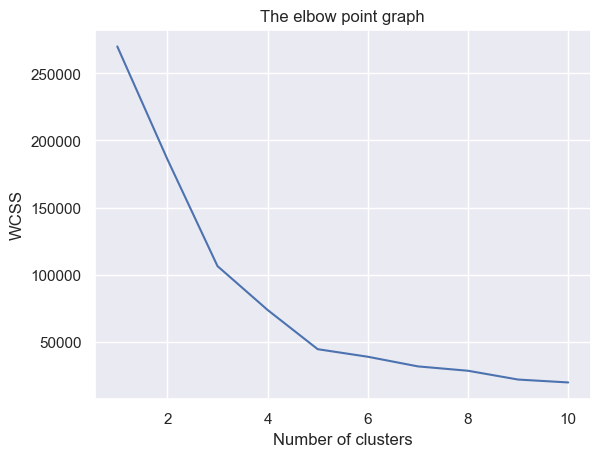

In [13]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
plt.close()

We have 2 elbow points in the curve (3,5). We can choose 5 becuase after 5 there is no significant decrease in WCSS.

## Training the KMeans Model

In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=36)

# Return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
Y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0], dtype=int32)

## Visualizing the Clusters

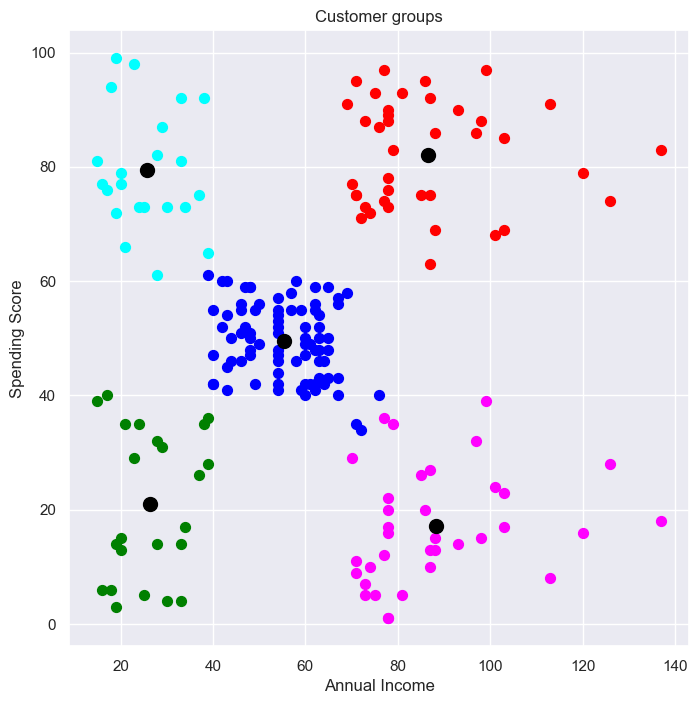

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

We now know which groups of people are not spending much money in the mall. We can target these people with some marketing strategies to increase their spending in the mall.